In [11]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import os
import scipy
import numpy as np
import seaborn as sns
from functools import reduce

from auditory_cortex.plotters import tikzplots
from auditory_cortex.analyses import Correlations, STRFCorrelations
from auditory_cortex.plotters.correlation_plotter import RegPlotter
from auditory_cortex.plotters.plotter_utils import PlotterUtils

import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline


In [12]:
threshold=0.5
save_tikz = True
lag = 200

multicorrect=True
correction_method='fdr_bh' #'fdr_bh' #

y_lims = [0.18, 0.85]
sig_offset_y=0.80
arch_ind_offset=0.85

### cochleogram models - permuted weights

INFO:Plotting trained and shuffled distributions for cochresnet50
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (489,)
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.6972764431085174, occurs at x_coordinate: 4
INFO:Peak corr (max): 1.092457478895415, occurs at x_coordinate: 2
INFO:Peak corr (median): 0.6287700781686768, occurs at x_coordinate: 0
INFO:Peak corr (max): 1.0837067006546954, occurs at x_coordinate: 0
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.633264301960968, occurs at x_coordinate: 0
INFO:Peak corr (max): 1.143353675999906, occurs at x_coordinate: 0
INFO:Trained-untrained: # of significant levels 6..
INFO:Trained-STRF: # of significant levels 5..
result saved at

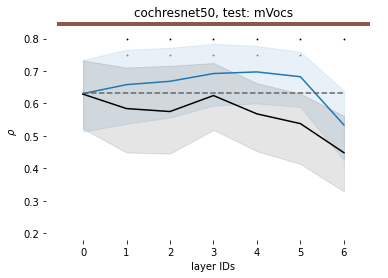

In [3]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
    # 'cochcnn9',
    'cochresnet50',
]
bin_width = 50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
untrained_identifier = trained_identifier.replace('ucsf', 'ucsf_reset')+'_permuted'
untrained_identifiers = [untrained_identifier]
tikz_indicator = f'trf{lag}_permuted'
baseline_identifier = f"coch_"+trained_identifier
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		# plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
        sig_offset_y=sig_offset_y,
        arch_ind_offset=arch_ind_offset,
        y_lims=y_lims,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

INFO:Plotting trained and shuffled distributions for cochresnet50
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.6058978834625197, occurs at x_coordinate: 3
INFO:Peak corr (max): 0.9432376147323828, occurs at x_coordinate: 1
INFO:Peak corr (median): 0.5774523047212267, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.8981991297447856, occurs at x_coordinate: 0
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.5350408969767726, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8919744485408868, occurs at x_coordinate: 0
INFO:Trained-untrained: # of significant levels 5..
INFO:Trained-STRF: # of significant levels 5..
result saved at: /depot/jgmakin/data/audit

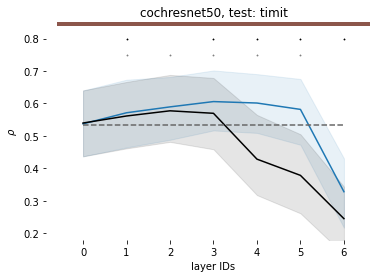

In [10]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
    # 'cochcnn9',
    'cochresnet50',
]
bin_width = 50
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifier = trained_identifier.replace('ucsf', 'ucsf_reset')+'_permuted'

untrained_identifiers = [untrained_identifier]
tikz_indicator = f'trf{lag}_permuted'
baseline_identifier = f"coch_"+trained_identifier
baseline_identifier = 'STRF_freqs80_'+baseline_identifier

# trained_identifier = untrained_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		# plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
        sig_offset_y=sig_offset_y,
        arch_ind_offset=arch_ind_offset,
        y_lims=y_lims,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

### deepspeech2 (untrained) with GELU

INFO:Plotting trained and shuffled distributions for deepspeech2
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (489,)
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.7073080155738546, occurs at x_coordinate: 2
INFO:Peak corr (max): 1.070042920307527, occurs at x_coordinate: 2
INFO:Peak corr (median): 0.6107427064570389, occurs at x_coordinate: 1
INFO:Peak corr (max): 1.0090554291209417, occurs at x_coordinate: 4
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.633264301960968, occurs at x_coordinate: 0
INFO:Peak corr (max): 1.143353675999906, occurs at x_coordinate: 0


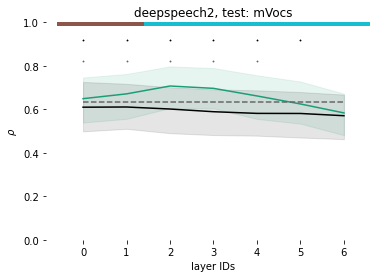

In [3]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	# 'wav2letter_modified',
	# 'wav2vec2',
	# 'speech2text',
	# 'whisper_tiny',
	# 'whisper_base',
	'deepspeech2',
]
bin_width = 50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
# untrained_identifier = trained_identifier.replace('ucsf', 'ucsf_reset')+'_permuted'
untrained_identifiers = ['ucsf_reset_mVocs_trf_lags200_bw50_regression_improved_using_gelu']
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

### layerwise plots - permuted weights

#### timit

INFO:Plotting trained and shuffled distributions for whisper_tiny
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5924593921399006, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9298824673090876, occurs at x_coordinate: 2
INFO:Peak corr (median): 0.5718231395043172, occurs at x_coordinate: 1
INFO:Peak corr (max): 0.8904997327748708, occurs at x_coordinate: 1
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.5350408969767726, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8919744485408868, occurs at x_coordinate: 0
INFO:Trained-untrained: # of significant levels 3..
INFO:Trained-STRF: # of significant levels 3..
result saved at: /depot/jgmakin/data/audit

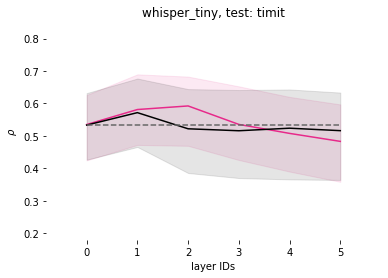

In [13]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	# 'wav2letter_modified',
	# 'wav2vec2',
	# 'speech2text',
	'whisper_tiny',
	# 'whisper_base',
	# 'deepspeech2',
]
bin_width = 50
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifier = trained_identifier.replace('ucsf', 'ucsf_reset')+'_permuted_sanity'
untrained_identifiers = [untrained_identifier]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		# plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

INFO:Plotting trained and shuffled distributions for whisper_tiny
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (404,)
INFO:Extracting column: normalized_test_cc
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.5924593921399006, occurs at x_coordinate: 2
INFO:Peak corr (max): 0.9298824673090876, occurs at x_coordinate: 2
INFO:Peak corr (median): 0.5705054219886119, occurs at x_coordinate: 1
INFO:Peak corr (max): 0.8851718927419822, occurs at x_coordinate: 2
INFO:Filtering 'normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.5350408969767726, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8919744485408868, occurs at x_coordinate: 0
INFO:Trained-untrained: # of significant levels 3..
INFO:Trained-STRF: # of significant levels 3..
result saved at: /depot/jgmakin/data/audit

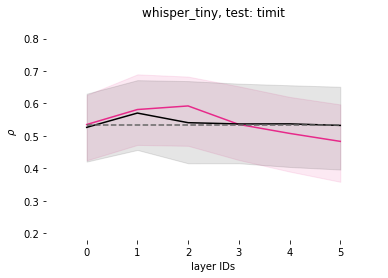

In [14]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	# 'wav2letter_modified',
	# 'wav2vec2',
	# 'speech2text',
	'whisper_tiny',
	# 'whisper_base',
	# 'deepspeech2',
]
bin_width = 50
trained_identifier = f'ucsf_timit_trf_lags{lag}_bw50_regression_improved'
untrained_identifier = trained_identifier.replace('ucsf', 'ucsf_reset')+'_permuted'
untrained_identifiers = [untrained_identifier]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		# plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)
# model_name = model_names[0]
# plt.savefig(f"layerwise_{model_name}.svg", dpi=300, bbox_inches='tight')

#### mVocs

INFO:Plotting trained and shuffled distributions for wav2letter_modified
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Number of channels returned: (489,)
INFO:Extracting column: mVocs_normalized_test_cc
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
INFO:Peak corr (median): 0.6934439030939666, occurs at x_coordinate: 4
INFO:Peak corr (max): 1.1247508234603198, occurs at x_coordinate: 6
INFO:Peak corr (median): 0.4742579303026551, occurs at x_coordinate: 0
INFO:Peak corr (max): 0.8723931246569955, occurs at x_coordinate: 7
INFO:Filtering 'mVocs_normalizer' using multiple of 0.500 with std dev ...
model_name 'baseline' not recognizable!!!
INFO:Peak corr (median): 0.633264301960968, occurs at x_coordinate: 0
INFO:Peak corr (max): 1.143353675999906, occurs at x_coordinate: 0
INFO:Trained-untrained: # of significant levels 14..
INFO:Trained-STRF: # of significant levels 10..
INFO:

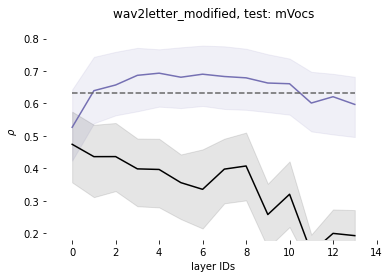

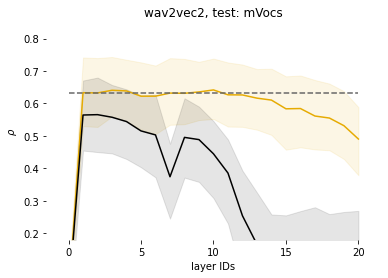

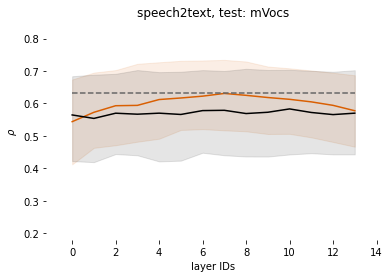

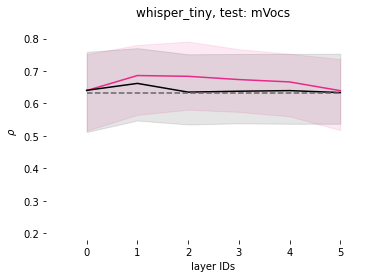

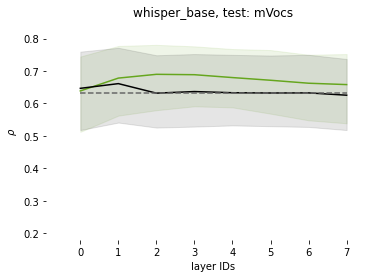

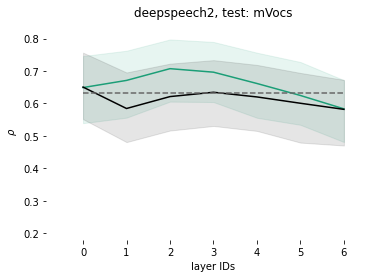

In [6]:
from auditory_cortex.plotters.tikzplots import plot_trained_vs_shuffled_network_results
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
]
bin_width = 50
trained_identifier = f'ucsf_mVocs_trf_lags{lag}_bw50_regression_improved'
untrained_identifier = trained_identifier.replace('ucsf', 'ucsf_reset')+'_permuted'
untrained_identifiers = [untrained_identifier]
tikz_indicator = f'trf{lag}'
baseline_identifier = f"coch_ucsf_mVocs_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
if 'mVocs' in trained_identifier:
	mVocs=True
else:
	mVocs=False
normalized=True
plot_trained_vs_shuffled_network_results(
		model_names=model_names,
		normalized=normalized,
		threshold=threshold,
		untrained_identifiers = untrained_identifiers,
		trained_identifier = trained_identifier,
		# areas = ['core', 'belt', 'parabelt'],
		baseline_identifier=baseline_identifier,
		indicate_significance=True,
		# plot_difference=False,
		display_dotted_lines=False,
		mVocs=mVocs,
		save_tikz=save_tikz,
		arch_ind_lw=8,
		sig_ind_size=1,
		tikz_indicator=tikz_indicator,
		bin_width=bin_width,
		plot_baseline=True,
		use_stat_inclusion=False,
)